# Exploratory data analysis

## 1. Dataset description

1) Global COVID-19 datasets

- The two COVID-19 datasets, [the global confirmed dataset](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv) and [the global death dataset](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv), are from the [data repository](https://github.com/CSSEGISandData/COVID-19) for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). The dataset is updated everyday starting from January 22nd, 2020.

- Both datasets contain columns of location information (`Province/State`, `Country/Region`, `Lat`, and `Long`) or daily accumulated number of confirmed or deaths in the corresponding location, starting from `1/22/20` to present.

- As stated in the dataset repository, "Australia, Canada and China are reported at the province/state level. Dependencies of the Netherlands, the UK, France and Denmark are listed under the province/state level. The US and other countries are at the country level."

- The datasets combine data from multiple sources and may contain mistakes.

2) Country statistics datasets

+ [Population ages 65 and above (% of total population)](https://data.worldbank.org/indicator/SP.POP.65UP.TO.ZS) from the [World Bank Open Data](https://data.worldbank.org/).

+ [Population ages 15-64 (% of total population)](https://data.worldbank.org/indicator/SP.POP.1564.TO.ZS) from the World Bank Open Data.

+ [Smoking prevalence, total (ages 15+)](https://data.worldbank.org/indicator/SH.PRV.SMOK) from the World Bank Open Data.

+ [PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)](https://data.worldbank.org/indicator/EN.ATM.PM25.MC.M3) from the World Bank Open Data.

+ [Hospital beds (per 1,000 people)](https://data.worldbank.org/indicator/SH.MED.BEDS.ZS) from the World Bank Open Data.

+ [Physicians (per 1,000 people)](https://data.worldbank.org/indicator/SH.MED.PHYS.ZS) from the World Bank Open Data.

+ [Nurses and midwives (per 1,000 people)](https://data.worldbank.org/indicator/SH.MED.NUMW.P3) from the World Bank Open Data.

+ [Population, total](https://data.worldbank.org/indicator/SP.POP.TOTL) from the World Bank Open Data.

+ [Population density (people per sq. km of land area)](https://data.worldbank.org/indicator/EN.POP.DNST) from the World Bank Open Data.

+ [Oxford Covid-19 Government Response Tracker data](https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv) from the [Oxford Covid-19 Government Response Tracker repository](https://github.com/OxCGRT/covid-policy-tracker/)
    


## 2. Load the dataset

In [122]:
library(MASS)
library(mice)
library(resample)

library(testthat)
library(rjson)

library(plotly)
library(htmlwidgets)
library(repr)
library(cowplot)
library(tidyverse)



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




In [ ]:
# get the most recent global COVID-19 confirmed and deaths datasets
url <- "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series"
covid19_confirmed <- read_csv(paste(url, "/time_series_covid19_confirmed_global.csv?raw=true", sep = ""))
covid19_death <- read_csv(paste(url, "/time_series_covid19_deaths_global.csv?raw=true", sep = ""))

In [ ]:
# get the most recent government response dataset
gov <- read_csv("https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv")

In [4]:
head(covid19_confirmed)

Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335
NA,Albania,41.1533,20.1683,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,782
NA,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154
NA,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,745
NA,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,30
NA,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,24,24,24,24,24,24,24,24,24,25


In [5]:
head(gov)

CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aruba,ABW,20200101,0,NA,0,NA,0,NA,0,...,0,0,0,NA,NA,NA,0,0,0,0
Afghanistan,AFG,20200101,0,NA,0,NA,0,NA,0,...,0,0,0,NA,0,0,0,0,0,0
Angola,AGO,20200101,0,NA,0,NA,0,NA,0,...,0,0,0,NA,NA,NA,0,0,0,0
Albania,ALB,20200101,0,NA,0,NA,0,NA,0,...,0,0,0,NA,NA,NA,0,0,0,0
Andorra,AND,20200101,0,NA,0,NA,0,NA,NA,...,0,0,0,NA,NA,NA,0,0,0,0
United Arab Emirates,ARE,20200101,0,NA,0,NA,0,NA,0,...,0,0,0,NA,0,0,0,0,0,0


In [ ]:
#' Read raw data into data frame
#'
#' @param label the file name
#' @param skip lines to skip
#'
#' @return dataframe
get_data <- function(label, skip = 4){
    read_csv(paste("../data/raw_data/", label, sep = ""), skip = skip)
}

filenames <- fromJSON(file = "../data/clean_data/filenames.json")

# get country statistics
age_65up <- get_data(filenames["age_65up"])
age_1564 <- get_data(filenames["age_1564"])
air_pollution <- get_data(filenames["air_pollution"])
medical_bed <- get_data(filenames["medical_bed"])
physicians <- get_data(filenames["physicians"])
nurses_midwives <- get_data(filenames["nurses_midwives"])
population_density <- get_data(filenames["population_density"])
population_total <- get_data(filenames["population_total"])
smoking <- get_data(filenames["smoking"])

In [ ]:
# head(age_65up)
# head(age_1564)
# head(air_pollution)
# head(medical_bed)
# head(physicians)
# head(nurses_midwives)
# head(population_density)
# head(population_total)
# head(smoking)

## 3. Explore the dataset

In [6]:
print("Check the dimension of the global confirmed dataset:")
dim(covid19_confirmed)
print(paste("The most recent data in the global confirmed dataset is from", 
      colnames(covid19_confirmed)[length(covid19_confirmed)]))

print("Check the dimension of the global deaths dataset:")
dim(covid19_death)
print(paste("The most recent data in the global deaths dataset is from", 
            colnames(covid19_death)[length(covid19_death)]))

print(paste("There are", length(unique(covid19_confirmed[`Country/Region`])), 
            "unqiue countries in the global COVID-19 datasets"))


print(paste("There are", length(unique(age_65up$country)), 
            "unqiue countries in the datasets from the world bank open data.")

print(paste("There are", length(unique(gov$CountryName)), 
            "unqiue countries in the government response dataset.")


[1] 266 105

[1] "5/1/20"

[1] 266 105

[1] "5/1/20"

[1] 151

In [7]:
test_that("Column names of covid19_confirmed and covid19_death should be the same.",
          {expect_true(all(colnames(covid19_confirmed) == colnames(covid19_death)))
          })

test_that("The country column of covid19_confirmed and covid19_death should be the same.",
          {expect_true(all(covid19_confirmed[2] == covid19_death[2]))
          })

test_that("The last column of covid19_confirmed should not have missing values.",
          {expect_true(all(!is.na(covid19_confirmed[length(covid19_confirmed)])))
          })

test_that("The last column of covid19_death should not have missing values.",
          {expect_true(all(!is.na(covid19_death[length(covid19_death)])))
          })

## 4. Initial thoughts

- I want to know the relationship between the portion of the senior in the population and the COVID-19 death rate. Considering the interpretability of a linear model, I'll use a linear model to explain the relationship.

- I'll need to get the current death rate from the most recent confirmed and deaths numbers.

- I'll include all the ten potential confounding variables in my linear regression model. 

- I won't include the confirmed and deaths numbers in my model. But I should include some statistics to indicate the severity of the COVID-19 in a country.

## 5. Wrangling

In [19]:
#' Clean raw data
#'
#' @param df the dataframe
#' @param name the col name
#'
#' @return cleaned dataframe
clean_data <- function(df, name){
    colnames(df)[1] <- 'country' 
    ret <- df[c(-2, -3, -4)] %>%
        gather(year, {{name}}, -country) %>%
        drop_na() %>%
        group_by(country) %>%
        top_n(1, year) %>%
        ungroup() %>%
        mutate(country = case_when(country == 'Bahamas, The' ~ 'Bahamas',
                                   country == 'Brunei Darussalam' ~ 'Brunei',
                                   country == 'Egypt, Arab Rep.' ~ 'Egypt',
                                   country == 'Gambia, The' ~ 'Gambia',
                                   country == 'Iran, Islamic Rep.' ~ 'Iran',
                                   country == 'Korea, Dem. People’s Rep.' ~ 'South Korea',
                                   country == 'Czech Republic' ~ 'Czechia',
                                   country == 'Lao PDR' ~ 'Laos',
                                   country == 'Russian Federation' ~ 'Russia',
                                   country == 'St. Lucia' ~ 'Saint Lucia',
                                   country == 'St. Vincent and the Grenadines' ~ 'Saint Vincent and the Grenadines',
                                   country == 'Slovak Republic' ~ 'Slovakia',
                                   country == 'Syrian Arab Republic' ~ 'Syria',
                                   country == 'Venezuela, RB' ~ 'Venezuela',
                                   country == 'Sub-Saharan Africa' ~ 'Western Sahara',
                                   country == 'Yemen, Rep.' ~ 'Yemen',
                                   TRUE ~ country))
    colnames(ret)[2] <- paste("year_", name, sep="")
    ret
}

In [20]:
# clean data
age_65up <- clean_data(age_65up, "age_65up")
age_1564 <- clean_data(age_1564, "age_1564")
air_pollution <- clean_data(air_pollution, "air_pollution")
medical_bed <- clean_data(medical_bed, "med_bed")
physicians <- clean_data(physicians, "physicians")
nurses_midwives <- clean_data(nurses_midwives, "nurses_midwives")
population_density <- clean_data(population_density, "pop_density")
population_total <- clean_data(population_total, "pop_total")
smoking <- clean_data(smoking, "smoking")

In [21]:
# save cleaned data
write_csv(age_65up, "../data/clean_data/age_65up_clean.csv")
write_csv(age_1564, "../data/clean_data/age_1564_clean.csv")
write_csv(air_pollution, "../data/clean_data/air_pollution_clean.csv")
write_csv(medical_bed, "../data/clean_data/medical_bed_clean.csv")
write_csv(physicians, "../data/clean_data/physicians_clean.csv")
write_csv(nurses_midwives, "../data/clean_data/nurses_midwives.csv")
write_csv(population_density, "../data/clean_data/population_density_clean.csv")
write_csv(population_total, "../data/clean_data/population_total_clean.csv")
write_csv(smoking, "../data/clean_data/smoking_clean.csv")

In [ ]:
# read in clean data
age_65up <- read_csv("../data/clean_data/age_65up_clean.csv")
age_1564 <- read_csv("../data/clean_data/age_1564_clean.csv")
air_pollution <- read_csv("../data/clean_data/air_pollution_clean.csv")
medical_bed <- read_csv("../data/clean_data/medical_bed_clean.csv")
physicians <- read_csv("../data/clean_data/physicians_clean.csv")
nurses_midwives <- read_csv("../data/clean_data/nurses_midwives.csv")
population_density <- read_csv("../data/clean_data/population_density_clean.csv")
population_total <- read_csv("../data/clean_data/population_total_clean.csv")
smoking <- read_csv("../data/clean_data/smoking_clean.csv")

In [ ]:
# dim(age_65up)
# dim(age_1564)
# dim(air_pollution)
# dim(medical_bed)
# dim(physicians)
# dim(nurses_midwives)
# dim(population_density)
# dim(population_total)
# dim(smoking)

In [9]:
# combine country statistics datasets into one dataframe
df_list <- list(population_total, age_65up, age_1564, air_pollution, medical_bed, 
                physicians, nurses_midwives, population_density, smoking)
country_data <- Reduce(function(left, right) merge(left, right, all = TRUE), df_list)
dim(country_data)
head(country_data)

[1] 263  19

country,year_pop_total,pop_total,year_age_65up,age_65up,year_age_1564,age_1564,year_air_pollution,air_pollution,year_med_bed,med_bed,year_physicians,physicians,year_nurses_midwives,nurses_midwives,year_pop_density,pop_density,year_smoking,smoking
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2018,37172386,2018,2.584927,2018,54.32490,2017,56.91081,2015,0.5,2016,0.2840,2014,0.3200,2018,56.93776,NA,NA
Albania,2018,2866376,2018,13.744736,2018,68.58239,2017,18.20060,2013,2.9,2016,1.1998,2016,3.5998,2018,104.61226,2016,28.7
Algeria,2018,42228429,2018,6.362497,2018,63.48882,2017,38.88401,2015,1.9,2016,1.8300,2016,2.2400,2018,17.73008,2016,15.6
American Samoa,2018,55465,NA,NA,NA,NA,2017,12.47382,NA,NA,1999,0.7810,NA,NA,2018,277.32500,NA,NA
Andorra,2018,77006,NA,NA,NA,NA,2017,10.30762,2009,2.5,2015,3.3333,2015,4.0128,2018,163.84255,2016,33.5
Angola,2018,30809762,2018,2.216374,2018,50.97470,2017,32.38850,2005,0.8,2017,0.2149,2009,1.3123,2018,24.71305,NA,NA


In [10]:
# make the confirmed and deaths datasets tidy
colnames(covid19_confirmed)[2] = "country"
confirmed <- covid19_confirmed %>%
    select(-`Province/State`, -Lat, -Long) %>%
    gather("date", "confirmed", - country)

colnames(covid19_death)[2] = "country"
death <- covid19_death %>%
    select(-`Province/State`, -Lat, -Long) %>%
    gather("date", "death", - country)

# combine confirmed and deaths datasets
total <- merge(confirmed, death, by = c("country", "date"))

# calculates the current confirmed and deaths numbers and
# death rate for each country
# also caluclate those two indexes:
# con_500_ind = days with 1-500 confirmed/days with >1 confirmed
# death_100_ind = days with 1-100 deaths/days with >1 deaths
covid19 <- total %>%
    mutate(date = lubridate::mdy(date)) %>%
    group_by(country, date) %>%
    summarize(confirmed = sum(confirmed),
              death = sum(death)) %>%
    group_by(country) %>%
    summarize(con_500_ind = sum(confirmed <= 500 & confirmed > 0)/sum(confirmed > 0),
              death_100_ind = sum(death <= 100 & confirmed > 0)/sum(confirmed > 0),
              confirmed = max(confirmed),
              death = max(death),
              rate = death/confirmed)

dim(covid19)

[1] 187   6

In [ ]:
# All rate values are valid
covid19 %>%
    filter(rate >= 1)

In [11]:
# get the highest stringency index for each country
# and calculate this index:
# ind_80 = days with 0-80 stringency index/total days
colnames(gov)[1] = "country"

gov_resp <- gov %>%
    mutate(date = lubridate::ymd(Date)) %>%
    select(country, date, StringencyIndexForDisplay) %>%
    group_by(country) %>%
    summarize(ind_80 = sum(StringencyIndexForDisplay <= 80, na.rm = TRUE)/n(),
              gov_resp = max(StringencyIndexForDisplay, na.rm = TRUE))

dim(gov_resp)

[1] 151   3

In [ ]:
# some country names in those two datasets don't agree
covid19 %>%
    filter(!country %in% country_data$country)

In [ ]:
# some country names in those two datasets don't agree
gov_resp %>%
    filter(!country %in% covid19$country)

In [12]:
# fix country names
gov_resp <- gov_resp %>%
    mutate(country = case_when(country == 'Cape Verde' ~ 'Cabo Verde',
                               country == 'Czech Republic' ~ 'Czechia',
                               country == 'Democratic Republic of Congo' ~ 'Congo, Dem. Rep.',
                               country == 'Slovak Republic' ~ 'Slovakia',
                               TRUE ~ country))

covid19 <- covid19 %>%
    mutate(country = case_when(country == 'Burma' ~ 'Myanmar',
                               country == 'Congo (Brazzaville)' ~ 'Congo, Rep.',
                               country == 'Congo (Kinshasa)' ~ 'Congo, Dem. Rep.',
                               country == 'Korea, South' ~ 'South Korea',
                               country == 'Kyrgyzstan' ~ 'Kyrgyz Republic',
                               country == 'US' ~ 'United States',
                               TRUE ~ country))

In [ ]:
# names not in country_data
covid19 %>%
    filter(!country %in% country_data$country)

In [ ]:
# names not in country_data
gov_resp %>%
    filter(!country %in% covid19$country)

In [13]:
# combine country_data and covid19
data <- merge(country_data, covid19, by = "country")

# calculate confirmed_rate, which is the percentage of
# confirmed in the total population per country
data$confirmed_rate <- data$confirmed / data$pop_total
dim(data)

# add in government response data
data_cp <- merge(data, gov_resp, by = "country")
dim(data_cp)
colnames(data_cp)

[1] 182  25

[1] 141  27

[1] "country"              "year_pop_total"       "pop_total"           
 [4] "year_age_65up"        "age_65up"             "year_age_1564"       
 [7] "age_1564"             "year_air_pollution"   "air_pollution"       
[10] "year_med_bed"         "med_bed"              "year_physicians"     
[13] "physicians"           "year_nurses_midwives" "nurses_midwives"     
[16] "year_pop_density"     "pop_density"          "year_smoking"        
[19] "smoking"              "con_500_ind"          "death_100_ind"       
[22] "confirmed"            "death"                "rate"                
[25] "confirmed_rate"       "ind_80"               "gov_resp"

In [15]:
# countries with small confirmed number but high death rate
# are removed, since the sample size is relatively small
countries <- data_cp %>%
    filter(confirmed <= 50, rate > 0.1) %>%
    pull(country)

# remove columns that won't appear in the analysis
df_cp <- data_cp[c(-2, -3, -4, -6, -7, -8, -10, -12, -14, -16, -18, -22, -23)] %>%
    filter(!country %in% countries)

str(df_cp)
summary(df_cp)

'data.frame':	138 obs. of  14 variables:
 $ country        : chr  "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ age_65up       : num  2.58 13.74 6.36 NA 2.22 ...
 $ air_pollution  : num  56.9 18.2 38.9 10.3 32.4 ...
 $ med_bed        : num  0.5 2.9 1.9 2.5 0.8 5 3.8 7.6 4.7 2 ...
 $ physicians     : num  0.284 1.2 1.83 3.333 0.215 ...
 $ nurses_midwives: num  0.32 3.6 2.24 4.01 1.31 ...
 $ pop_density    : num  56.9 104.6 17.7 163.8 24.7 ...
 $ smoking        : num  NA 28.7 15.6 33.5 NA 21.8 14.7 29.6 20.8 26.4 ...
 $ con_500_ind    : num  0.676 0.704 0.493 0.557 1 ...
 $ death_100_ind  : num  1 1 0.567 1 1 ...
 $ rate           : num  0.0291 0.0396 0.1091 0.0577 0.0667 ...
 $ confirmed_rate : num  6.28e-05 2.73e-04 9.84e-05 9.67e-03 9.74e-07 ...
 $ ind_80         : num  1 0.59 0.672 1 0.877 ...
 $ gov_resp       : num  76.3 88.4 84.5 61.8 93.4 ...


   country             age_65up      air_pollution       med_bed      
 Length:138         Min.   : 1.085   Min.   : 5.861   Min.   : 0.100  
 Class :character   1st Qu.: 3.595   1st Qu.:14.299   1st Qu.: 1.300  
 Mode  :character   Median : 7.175   Median :21.475   Median : 2.450  
                    Mean   : 9.360   Mean   :27.934   Mean   : 2.982  
                    3rd Qu.:15.093   3rd Qu.:37.874   3rd Qu.: 4.006  
                    Max.   :27.576   Max.   :94.054   Max.   :13.400  
                    NA's   :4        NA's   :2        NA's   :2       
   physicians     nurses_midwives    pop_density          smoking     
 Min.   :0.0008   Min.   : 0.1059   Min.   :   2.041   Min.   : 2.00  
 1st Qu.:0.4773   1st Qu.: 1.1509   1st Qu.:  32.880   1st Qu.:13.95  
 Median :1.7778   Median : 2.9324   Median :  91.183   Median :21.50  
 Mean   :1.9186   Mean   : 4.4862   Mean   : 211.234   Mean   :21.18  
 3rd Qu.:3.0255   3rd Qu.: 6.6673   3rd Qu.: 195.693   3rd Qu.:27.60  
 Max. 

## 6. Research questions

**Does the portion of the senior (age 65 and up) in the population (population aging) associate with the COVID-19 death rate?**

- Null hypothesis ($H_0$):

    + The portion of the senior (age 65 and up) in the population (population aging) is not associated with the COVID-19 death rate.

- Alternative hypothesis ($H_A$):

    + The portion of the senior (age 65 and up) in the population (population aging) is associated with the COVID-19 death rate.


## 7. Data Analysis & Visualizations

### Multinomial linear regression

I decided to test the relationship between the COVID-19 death rate ($Y$, `rate`) and the portion of the senior ($X$, `age_65up`) with a linear regression model. A linear regression model may not give me the most accurate model but is highly interpretable. To answer my research questions, I would sacrifice some accuracy for interpretability.

I'll first try the full model, which includes all confounding variables, to pick out potential useful confounding variables based on statistic significance (p-value < 0.05). Then I'll test reduced models to decide which variables to include in the final model. Considering that I'm doing multiple testing, I'll have to control for multiple comparisons using Benjamini & Hochberg (BH) False Discovery Rate (FDR) adjustment (setting FDR to 5%).

In [16]:
#' Report linear regression results
#'
#' @param model the fitted model to analyze
#'
#' @return results dataframe
analyze_lm <- function(model){
    model %>%
        broom::tidy() %>%
        mutate(p.value.adjust = p.adjust(p.value, method = "BH"),
               significant = p.value.adjust < 0.05)
}

#### 1) Check the full model, which contains all the potential confounding variables:

In [17]:
full_fit <- lm(rate ~ ., df_cp[-1])

analyze_lm(full_fit)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),9.654650e-02,4.547473e-02,2.1230805,3.619085e-02,0.0940962184,FALSE
age_65up,2.393292e-03,8.213353e-04,2.9139032,4.395470e-03,0.0190470367,TRUE
air_pollution,7.612676e-05,1.759419e-04,0.4326812,6.661689e-01,0.7490970491,FALSE
med_bed,-3.246831e-03,1.863033e-03,-1.7427668,8.441793e-02,0.1829055188,FALSE
physicians,1.202518e-03,3.021444e-03,0.3979946,6.914742e-01,0.7490970491,FALSE
nurses_midwives,-9.038064e-04,1.014401e-03,-0.8909752,3.750600e-01,0.6094725659,FALSE
pop_density,-3.683272e-06,3.478419e-06,-1.0588925,2.921746e-01,0.5426099529,FALSE
smoking,-5.751927e-05,3.577039e-04,-0.1608013,8.725711e-01,0.8725710798,FALSE
con_500_ind,4.157519e-02,1.710053e-02,2.4312222,1.680990e-02,0.0546321600,FALSE


The full model indicates that the coefficients for $X$ (`age_65up`), `death_100_ind`, and `confirmed_rate` are significant (adjusted p-value < 0.05). Besides, the adjust p-values for the coefficients of `con_500_ind` and `med_bed` are the next smallest. So I'll test those four confounding variables, `death_100_ind`, `con_500_ind`, `confirmed_rate`, and `med_bed`, in reduced models. 

#### 2) Check reduced models with selected confounding variables:

In [18]:
dim(df_cp)

# prepare the data frame for reduced models
df_sub <- df_cp %>%
    select(country, rate, age_65up, med_bed, con_500_ind, 
           death_100_ind, confirmed_rate) %>%
    drop_na()

# 5 observations are removed, which is not too bad
dim(df_sub)

[1] 138  14

[1] 133   7

In [19]:
# base model
base <- lm(rate ~ age_65up, df_sub[-1])

analyze_lm(base)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.025148220,0.0050773414,4.953029,2.210653e-06,4.421306e-06,TRUE
age_65up,0.001690546,0.0004434912,3.811905,2.113092e-04,2.113092e-04,TRUE


In [20]:
# add med_bed to the base model
fit_1 <- lm(rate ~ age_65up + med_bed, df_sub[-1])

analyze_lm(fit_1)
anova(fit_1, base)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.028633326,0.0050373581,5.684195,8.243881e-08,2.473164e-07,TRUE
age_65up,0.002861002,0.0005683334,5.034019,1.566798e-06,2.350197e-06,TRUE
med_bed,-0.004874636,0.0015515648,-3.141755,2.080019e-03,2.080019e-03,TRUE


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
130,0.1357513,NA,NA,NA,NA
131,0.1460586,-1,-0.0103073,9.870623,0.002080019


The model with `med_bed` is significantly (p-value < 0.05) different from the base model. I could add `med_bed` in my final model.

In [21]:
# add con_500_ind to the base model
fit_2 <- lm(rate ~ age_65up + con_500_ind, df_sub[-1])

analyze_lm(fit_2)
anova(fit_2, base)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.024087780,0.0118783663,2.02786976,0.044617110,0.066925665,FALSE
age_65up,0.001721501,0.0005443122,3.16270952,0.001945976,0.005837927,TRUE
con_500_ind,0.001232132,0.0124665398,0.09883511,0.921421427,0.921421427,FALSE


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
130,0.1460476,NA,NA,NA,NA
131,0.1460586,-1,-1.097422e-05,0.00976838,0.9214214


The model with `con_500_ind` is not significantly (p-value > 0.05) different from the base model. I would not add `con_500_ind` in my final model.

In [22]:
# add death_100_ind to the base model
fit_3 <- lm(rate ~ age_65up + death_100_ind, df_sub[-1])

analyze_lm(fit_3)
anova(fit_3, base)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.0850670794,0.0143303386,5.936153,2.497307e-08,7.491921e-08,TRUE
age_65up,0.0006806478,0.0004734009,1.437783,1.528984e-01,1.528984e-01,FALSE
death_100_ind,-0.0600774820,0.0135558008,-4.431865,1.965346e-05,2.948019e-05,TRUE


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
130,0.1268874,NA,NA,NA,NA
131,0.1460586,-1,-0.01917115,19.64143,1.965346e-05


The model with `death_100_ind` is significantly (p-value < 0.05) different from the base model, though the coefficient of $X$ (`age_65up`) becomes not significant. I would add `death_100_ind` in my final model.

In [23]:
# add confirmed_rate to the base model
fit_4 <- lm(rate ~ age_65up + confirmed_rate, df_sub[-1])

analyze_lm(fit_4)
anova(fit_4, base)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.027259784,0.0048034460,5.675048,8.604635e-08,2.581390e-07,TRUE
age_65up,0.001019093,0.0004463729,2.283054,2.405035e-02,2.405035e-02,TRUE
confirmed_rate,2.961363753,0.6988254211,4.237630,4.248710e-05,6.373066e-05,TRUE


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
130,0.1283315,NA,NA,NA,NA
131,0.1460586,-1,-0.01772704,17.95751,4.24871e-05


The model with `confirmed_rate` is significantly (p-value < 0.05) different from the base model. I would add `confirmed_rate` in my final model.

In [28]:
# add med_bed and death_100_ind to the base model
fit_5 <- lm(rate ~ age_65up + med_bed + death_100_ind, df_sub[-1])

analyze_lm(fit_5)
anova(fit_5, fit_1)
anova(fit_5, fit_3)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.084754051,0.0139218255,6.087855,1.219594e-08,4.878375e-08,TRUE
age_65up,0.001777011,0.0005906665,3.008485,3.157889e-03,3.685389e-03,TRUE
med_bed,-0.004326941,0.0014628428,-2.957899,3.685389e-03,3.685389e-03,TRUE
death_100_ind,-0.056661902,0.0132195166,-4.286231,3.527349e-05,7.054698e-05,TRUE


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
129,0.1188281,NA,NA,NA,NA
130,0.1357513,-1,-0.01692313,18.37178,3.527349e-05


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
129,0.1188281,NA,NA,NA,NA
130,0.1268874,-1,-0.008059279,8.749167,0.003685389


The model with both `med_bed` and `death_100_ind` is significantly (p-value < 0.05) different from the model with only one of the two variables. I would include both `med_bed` and `death_100_ind` in my final model.

Finally, I'll test the model with the three confounding variables, `med_bed`, `death_100_ind`, and `confirmed_rate`.

In [32]:
# try all the combinations to make sure that adding each confounder improves the model
fit_6 <- lm(rate ~ age_65up + med_bed + confirmed_rate, df_sub[-1])
fit_7 <- lm(rate ~ age_65up + death_100_ind + confirmed_rate, df_sub[-1])

# test whether adding `age_65up` improves the model
fit_8 <- lm(rate ~ age_65up + death_100_ind + confirmed_rate, df_sub[-1])

# add med_bed, death_100_ind and confirmed_rate to the base model
fit_9 <- lm(rate ~ age_65up + med_bed + death_100_ind + confirmed_rate, df_sub[-1])

analyze_lm(fit_9)
anova(fit_9, fit_5)
anova(fit_9, fit_6)
anova(fit_9, fit_7)
anova(fit_9, fit_8)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.075275323,0.0138864657,5.420769,2.845939e-07,1.422970e-06,TRUE
age_65up,0.001354907,0.0005907395,2.293579,2.344474e-02,2.344474e-02,TRUE
med_bed,-0.003762601,0.0014328336,-2.625986,9.693378e-03,1.211672e-02,TRUE
death_100_ind,-0.046099086,0.0133161445,-3.461894,7.296932e-04,1.824233e-03,TRUE
confirmed_rate,2.047119324,0.6878551046,2.976091,3.491637e-03,5.819395e-03,TRUE


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
128,0.1111378,NA,NA,NA,NA
129,0.1188281,-1,-0.007690317,8.857117,0.003491637


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
128,0.1111378,NA,NA,NA,NA
129,0.1215437,-1,-0.0104059,11.98471,0.0007296932


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
128,0.1111378,NA,NA,NA,NA
129,0.1171252,-1,-0.005987377,6.895801,0.009693378


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
128,0.1111378,NA,NA,NA,NA
129,0.1171252,-1,-0.005987377,6.895801,0.009693378


In [37]:
summary(base)
summary(fit_9)


Call:
lm(formula = rate ~ age_65up, data = df_sub[-1])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.044598 -0.026140 -0.009418  0.015794  0.100190 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0251482  0.0050773   4.953 2.21e-06 ***
age_65up    0.0016905  0.0004435   3.812 0.000211 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03339 on 131 degrees of freedom
Multiple R-squared:  0.09985,	Adjusted R-squared:  0.09297 
F-statistic: 14.53 on 1 and 131 DF,  p-value: 0.0002113



Call:
lm(formula = rate ~ age_65up + med_bed + death_100_ind + confirmed_rate, 
    data = df_sub[-1])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.047662 -0.020142 -0.007249  0.015331  0.096587 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0752753  0.0138865   5.421 2.85e-07 ***
age_65up        0.0013549  0.0005907   2.294  0.02344 *  
med_bed        -0.0037626  0.0014328  -2.626  0.00969 ** 
death_100_ind  -0.0460991  0.0133161  -3.462  0.00073 ***
confirmed_rate  2.0471193  0.6878551   2.976  0.00349 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02947 on 128 degrees of freedom
Multiple R-squared:  0.3151,	Adjusted R-squared:  0.2937 
F-statistic: 14.72 on 4 and 128 DF,  p-value: 6.417e-10


The model with `med_bed`, `death_100_ind`, and `confirmed_rate` is significantly (p-value < 0.05) different from the models with only two of the three variables. I would include `med_bed`, `death_100_ind`, and `confirmed_rate` in my final model.

Compared to the base model, including those three confounding variables improves the model. Adjusted $R^2$ increased from 0.0966 to 0.294, though it is still not well fitted (only 29.4% variance explained by the model). I'll then check model assumptions to see whether this is a valid model.



#### 3) Check model assumptions:

In [215]:
#' Plots linear regression diagnostics results
#'
#' @param model the fitted model to analyze
#' @param formula the model formula
#'
#' @return plots
plot_model_diag <- function(model, formula = "") {
    options(repr.plot.width = 12, repr.plot.height = 12)
    par(mfrow = c(2, 2), mar = c(5, 5, 4, 2) + 0.1, 
        cex.lab = 1.5, cex.axis = 1.3, cex.main = 1.5, cex.sub = 1.2)

    if (formula != "") {
        print(paste("Formula =", formula))
    }
    
    plot(model, cex.caption = 1.5, cex.id = 1.2)
}

[1] "Formula = rate ~ age_65up + med_bed + death_100_ind + confirmed_rate"


variable,statistic,p.value
<chr>,<dbl>,<dbl>
residuals(fit_9),0.9361628,9.101347e-06



	Bartlett test of homogeneity of variances

data:  .
Bartlett's K-squared = 3971.4, df = 5, p-value < 2.2e-16


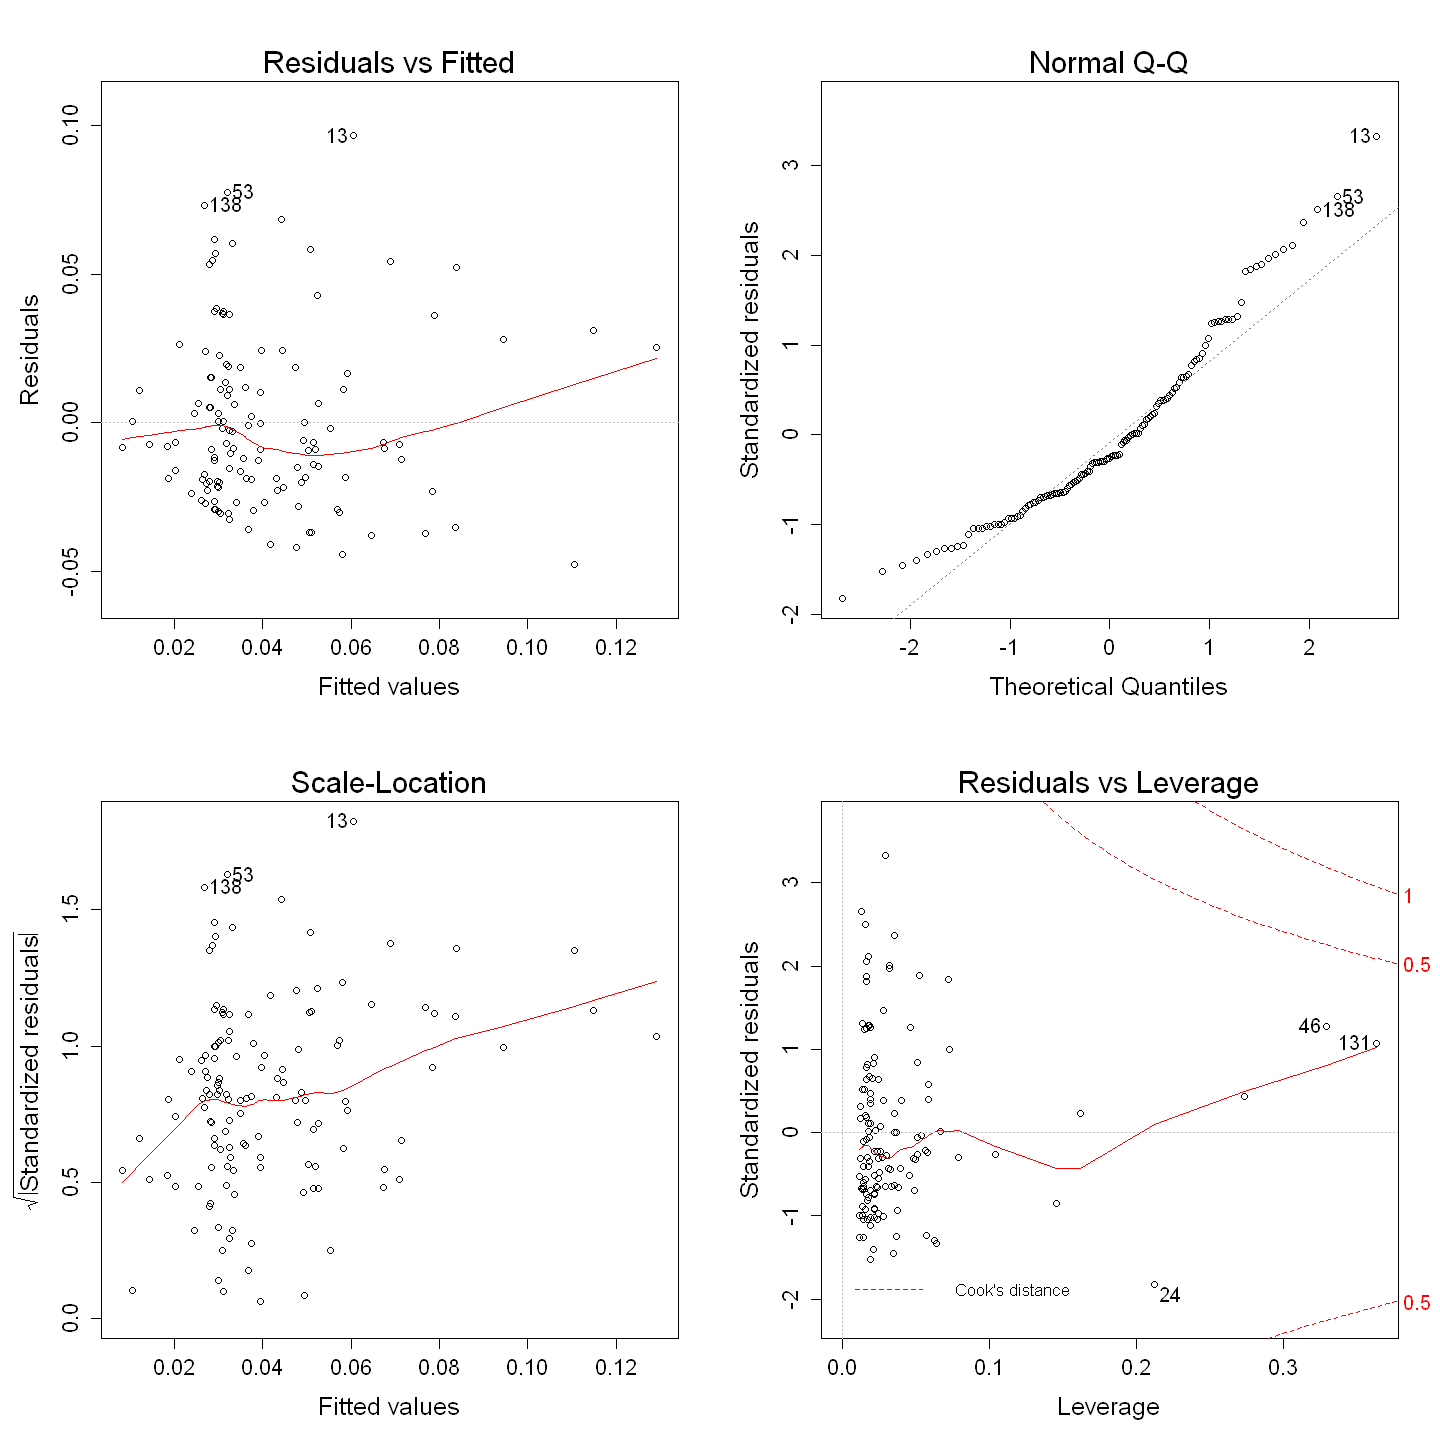

In [216]:
# plot model diagnostics
plot_model_diag(fit_9, "rate ~ age_65up + med_bed + death_100_ind + confirmed_rate")

# Compute Shapiro-Wilk test of normality
rstatix::shapiro_test(residuals(fit_9))

# Compute Bartlett test of homogeneity of variances
df_sub[-1] %>%
    bartlett.test(rate ~ age_65up + med_bed + death_100_ind + confirmed_rate)

To assess the model, I need to check whether the "LINE" conditions for multiple linear regression hold for this model. The data were collected in each country independently, so I would assume that the independence assumption is reasonable. Then, let's look at the rest assumptions:

First, check the Residuals vs Fitted plot for the linearity assumption. Residuals should have zero expectations at each fitted value. There are some obvious patterns in the plot and the averages of residuals are away from zero. So the linearity assumption does not hold and the LSE (Least Squares Estimator) might be biased and even inconsistent.

Second, check the Normal Q-Q plot for the normality assumption. Deviations of the lower and upper tails from the straight line indicates that the distribution of residuals does not conform to a normal distribution (right skewed in this case). Besides, the Shapiro-Wilk test of normality is significant. So the normality assumption is violated.

Third, check the Scale-Location plot for the equal variance assumption. There is a overall positive trend in the plot so the variance is not constant. Besides, the Bartlett test of homogeneity of variances is significant. So the equal variance assumption does not hold and the LSE may not be the BLUE (Best Linear Unbiased Estimator).

Finally, check the Residuals vs. Leverage plot for influential points. Three point are labeled for high Cook's distance values.

The model violates most of the "LINE" conditions. I would next consider improving the model with data transformation and GLM (General Linear Model).

#### 4) Data transformation and GLM

I'll find out the way to improve the model by trial and error. The process is omitted here. Note that the final model is the best model identified, not necessary the best model.

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.10298630,0.021993135,4.682657,7.071347e-06,2.828539e-05,TRUE
log(age_65up),0.01332487,0.004028499,3.307651,1.219253e-03,1.219253e-03,TRUE
log(med_bed),-0.01494410,0.003421579,-4.367604,2.555519e-05,5.111038e-05,TRUE
log(death_100_ind + 1),-0.10317467,0.028478554,-3.622890,4.176037e-04,5.568049e-04,TRUE



Call:
glm(formula = rate ~ log(age_65up) + log(med_bed) + log(death_100_ind + 
    1), family = Gamma(link = "identity"), data = .)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2279  -0.4484  -0.1509   0.2194   1.3500  

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.102986   0.021993   4.683 7.07e-06 ***
log(age_65up)           0.013325   0.004028   3.308 0.001219 ** 
log(med_bed)           -0.014944   0.003422  -4.368 2.56e-05 ***
log(death_100_ind + 1) -0.103175   0.028479  -3.623 0.000418 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.3122497)

    Null deviance: 49.945  on 132  degrees of freedom
Residual deviance: 37.135  on 129  degrees of freedom
AIC: -593.8

Number of Fisher Scoring iterations: 8


variable,statistic,p.value
<chr>,<dbl>,<dbl>
residuals(glm_fit),0.9800386,0.04775893



	Bartlett test of homogeneity of variances

data:  .
Bartlett's K-squared = 3973.4, df = 5, p-value < 2.2e-16


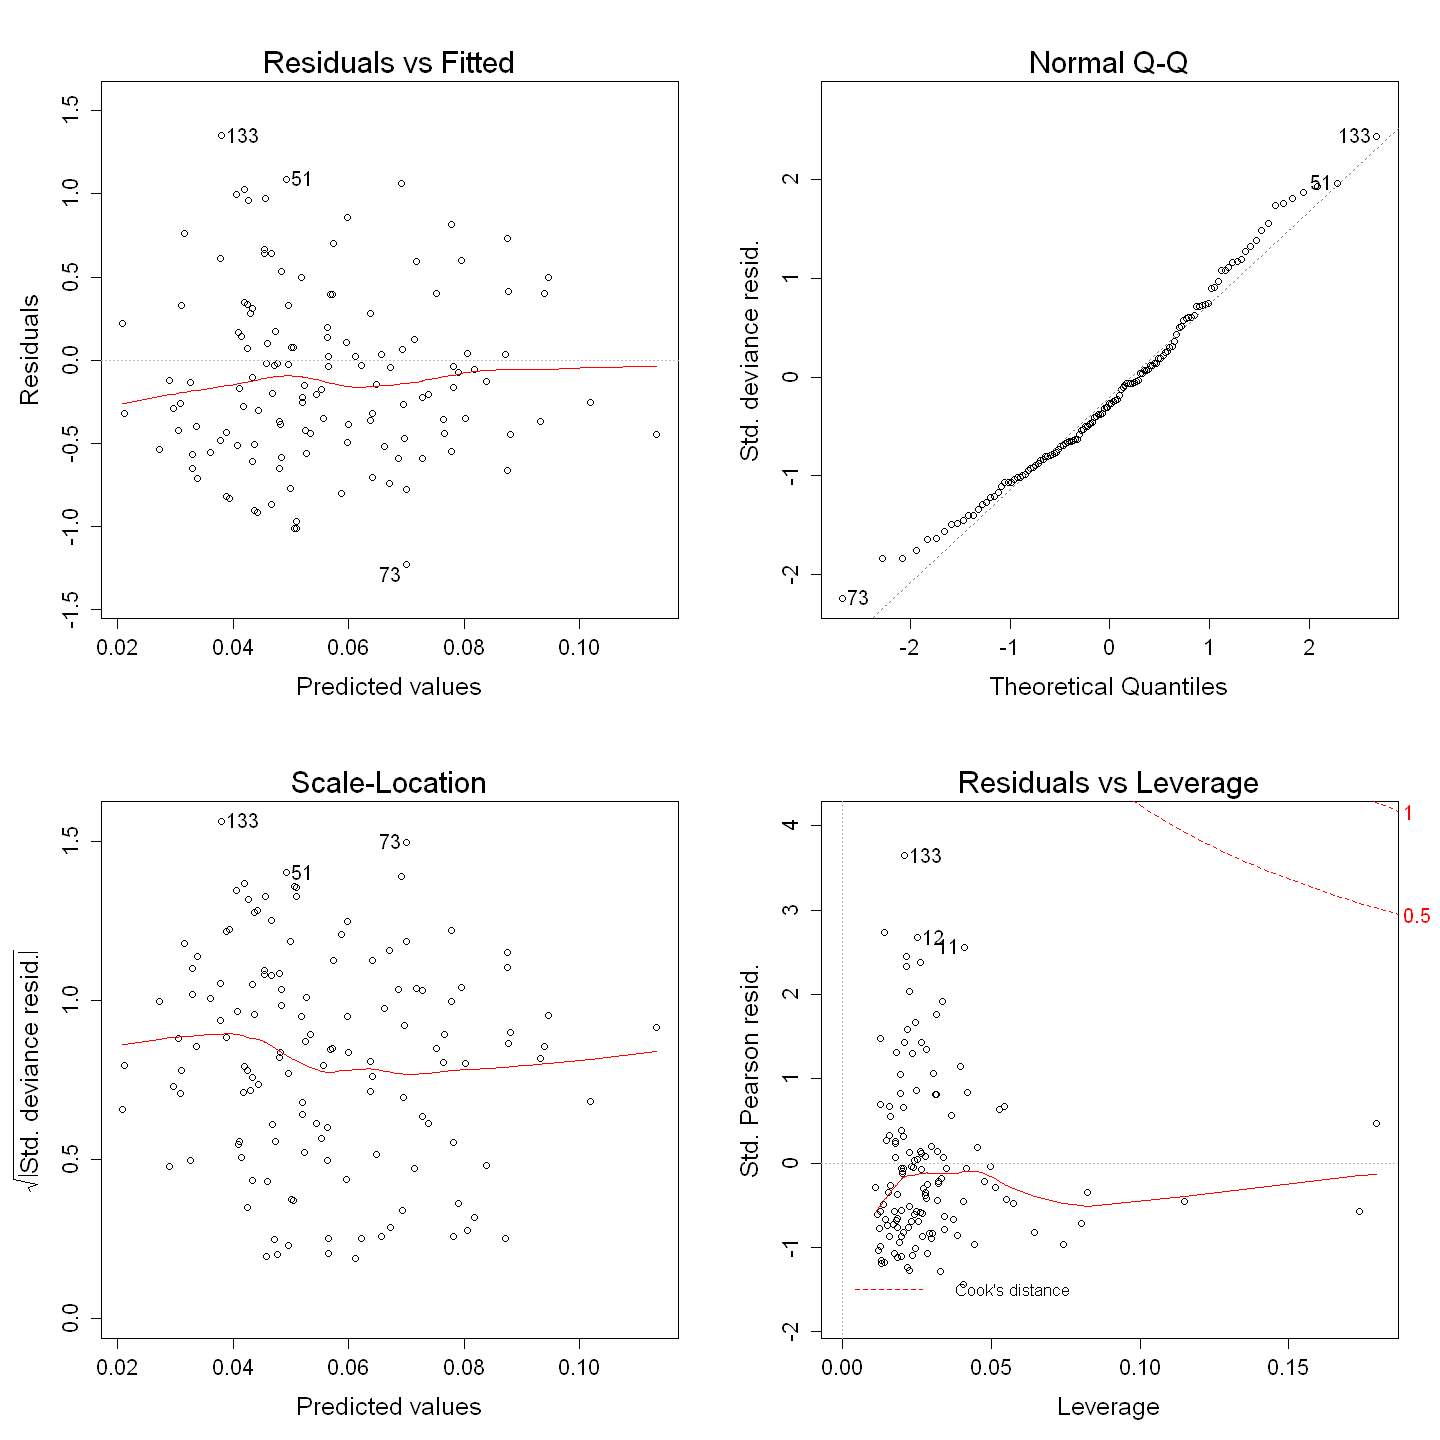

In [217]:
# this model is used in the boostrapping step
glm_fit <- df_sub %>%
    mutate(rate = (rate*(133 -1) + 2)/133) %>%
    glm(rate ~ log(age_65up) + log(med_bed) + 
        log(death_100_ind + 1), 
        family = Gamma(link = "identity"), .)

glm_fit_results <- analyze_lm(glm_fit)
glm_fit_results

summary(glm_fit)

# plot model diagnostics
plot_model_diag(glm_fit)

# Compute Shapiro-Wilk test of normality
rstatix::shapiro_test(residuals(glm_fit))

# Compute Bartlett test of homogeneity of variances
df_sub[-1] %>%
    mutate(rate = (rate*(133 -1) + 2)/133) %>%
    bartlett.test(rate ~ log(age_65up) + log(med_bed) + log(death_100_ind + 1))

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.086943410,0.0198482003,4.380418,2.440643e-05,4.067738e-05,TRUE
log(age_65up),0.014590687,0.0032729351,4.457982,1.787967e-05,4.067738e-05,TRUE
log(med_bed),-0.011905229,0.0034179247,-3.483175,6.787330e-04,7.712704e-04,TRUE
log(death_100_ind + 1),-0.132954227,0.0275857540,-4.819670,4.001685e-06,2.000842e-05,TRUE
log(confirmed_rate),-0.003324185,0.0009647784,-3.445543,7.712704e-04,7.712704e-04,TRUE



Call:
glm(formula = rate ~ log(age_65up) + log(med_bed) + log(death_100_ind + 
    1) + log(confirmed_rate), family = Gamma(link = "identity"), 
    data = .)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2313  -0.4510  -0.1328   0.2211   1.1606  

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.0869434  0.0198482   4.380 2.44e-05 ***
log(age_65up)           0.0145907  0.0032729   4.458 1.79e-05 ***
log(med_bed)           -0.0119052  0.0034179  -3.483 0.000679 ***
log(death_100_ind + 1) -0.1329542  0.0275858  -4.820 4.00e-06 ***
log(confirmed_rate)    -0.0033242  0.0009648  -3.446 0.000771 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.2749048)

    Null deviance: 49.945  on 132  degrees of freedom
Residual deviance: 34.435  on 128  degrees of freedom
AIC: -602.29

Number of Fisher Scoring iterations: 8


variable,statistic,p.value
<chr>,<dbl>,<dbl>
residuals(final_fit),0.9904483,0.4973985



	Bartlett test of homogeneity of variances

data:  .
Bartlett's K-squared = 3973.4, df = 5, p-value < 2.2e-16


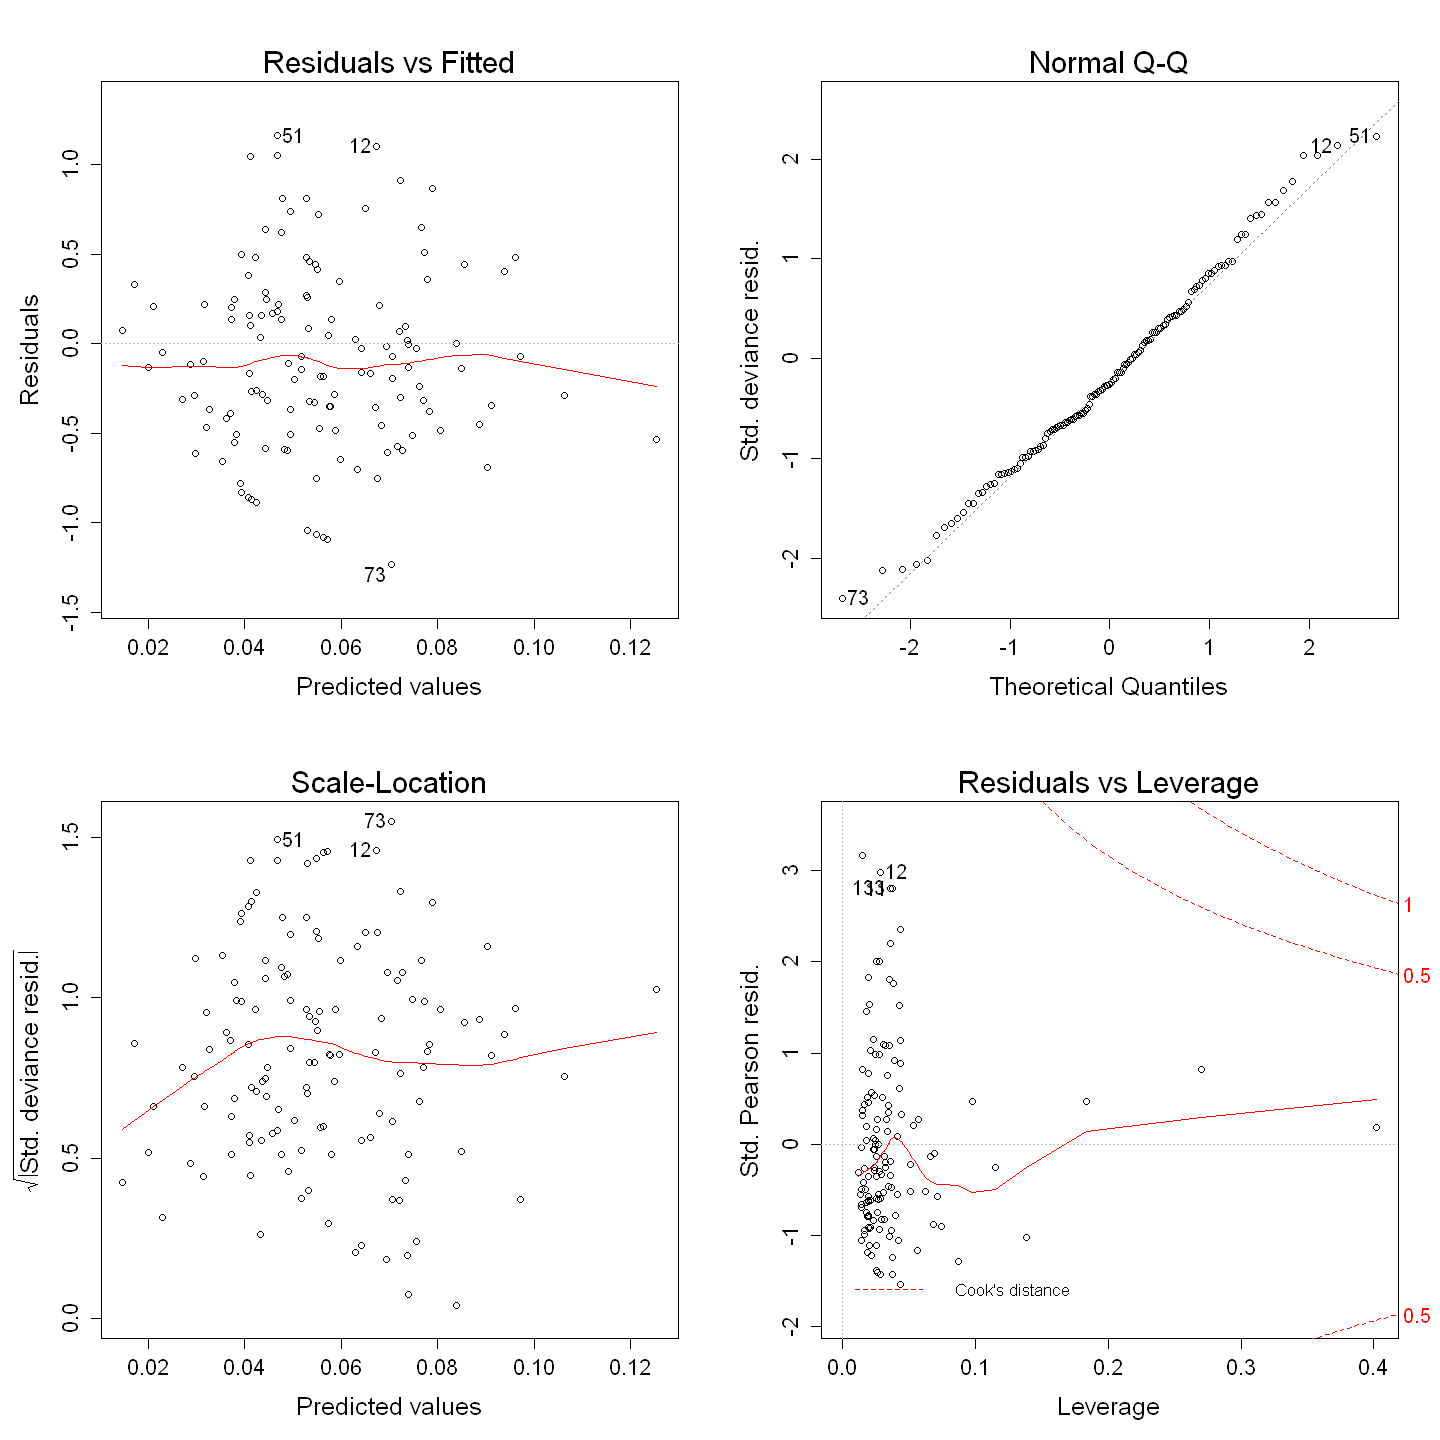

In [218]:
# final model
final_fit <- df_sub %>%
    mutate(rate = (rate*(133 -1) + 2)/133) %>%
    glm(rate ~ log(age_65up) + log(med_bed) + 
        log(death_100_ind + 1) + log(confirmed_rate), 
        family = Gamma(link = "identity"), .)

analyze_lm(final_fit)

summary(final_fit)

# plot model diagnostics
plot_model_diag(final_fit)

# Compute Shapiro-Wilk test of normality
rstatix::shapiro_test(residuals(final_fit))

# Compute Bartlett test of homogeneity of variances
df_sub[-1] %>%
    mutate(rate = (rate*(133 -1) + 2)/133) %>%
    bartlett.test(rate ~ log(age_65up) + log(med_bed) + log(death_100_ind+1) + log(confirmed_rate))

Again I'll check whether the "LINE" conditions to assess the model. The independence assumption is reasonable as before. For the rest assumptions:

First, the averages of residuals are slightly smaller than zero in the Residuals vs Fitted plot but may not be a big problem. I would say that the linearity assumption could hold here.

Second, the lower and upper tails are slightly away from the straight line in the Normal Q-Q plot. Besides, the Shapiro-Wilk test of normality is significant but the p-value is very close to 0.05. So there is some evidence that the normality assumption could be reasonable.

Third, the Scale-Location plot has some trends so the variance is not constant. And the Bartlett test of homogeneity of variances is significant. So the normality assumption could not hold.

Finally, three point are labeled for high Cook's distance values in the Residuals vs. Leverage plot.

The final model still violates some of the "LINE" conditions. So it may be not be reasonable to use the theoretical inferential conclusions. Instead, I'll use bootstrapping as an alternative approach to statistical inference.

#### 4) Bootstrapping

I'll take bootstrap samples from 133 countries in `df_sub` with replacement. This is case resampling, so the information from each country remain together. Note that I'll have to drop the `log(confirmed_rate)` term in the formula to make the `glm` results converge.

In [157]:
set.seed(12345)
N <- 1000

boot_results <- df_sub %>%
    mutate(rate = (rate*(133 -1) + 2)/133) %>%
    rsample::bootstraps(N) %>% 
    mutate(lm = map(splits, ~ glm(rate ~ log(age_65up) + log(med_bed) + 
                                  log(death_100_ind + 1), 
                                  family = Gamma(link = "identity"), .)),
           tidy = map(lm, broom::tidy)) %>% 
    select(-splits, -lm) %>% 
    unnest(tidy)


In [260]:
t <- theme(plot.title = element_text(size = 20),
           axis.title = element_text(size = 18),
           text = element_text(size = 16),
           legend.title = element_text(size = 18),
           legend.text = element_text(size = 18),
           strip.text.x = element_text(size = 18))

#' Plots bootstrapping results
#'
#' @param boot_results the bootstrapping results
#' @param var the variable to plot
#' @param model_results the model results
#'
#' @return ggplot plot
plot_results <-  function (boot_results, var, model_results){
    
    boot_fits <- boot_results %>% 
        filter(term == var)
    
    obs <- model_results %>% 
        filter(term == var)
    
    t_star <- (boot_fits$estimate - obs$estimate) / boot_fits$std.error
    pval_boot <- round((1 + sum(abs(t_star) > abs(obs$statistic))) / (N + 1), 4)

    df <- tibble(estimate = boot_fits$estimate,
           t_star = t_star) %>%
        gather("term", "value") 
    
    df %>%
        ggplot() +
            geom_histogram(aes(value), bins = 30) +
            facet_grid(cols = vars(term), scales = "free") + 
            geom_vline(data = df %>% filter(term == "t_star"), 
                       aes(xintercept = obs$statistic, color = "Observed t")) +
            geom_vline(data = df %>% filter(term == "estimate"), 
                       aes(xintercept = obs$estimate, color = "Observed estimate")) +
            theme_bw() +
            labs(title = paste("Bootstrap distributions of the coefficient of ", var, 
                               "\np-value = ", pval_boot, sep = ""),
                 color = "Line") + t
    
}

In [261]:
age_65up_plot <- plot_results(boot_results, "log(age_65up)", glm_fit_results)
med_bed_plot <- plot_results(boot_results, "log(med_bed)", glm_fit_results)
death_100_ind_plot <- plot_results(boot_results, "log(death_100_ind + 1)", glm_fit_results)

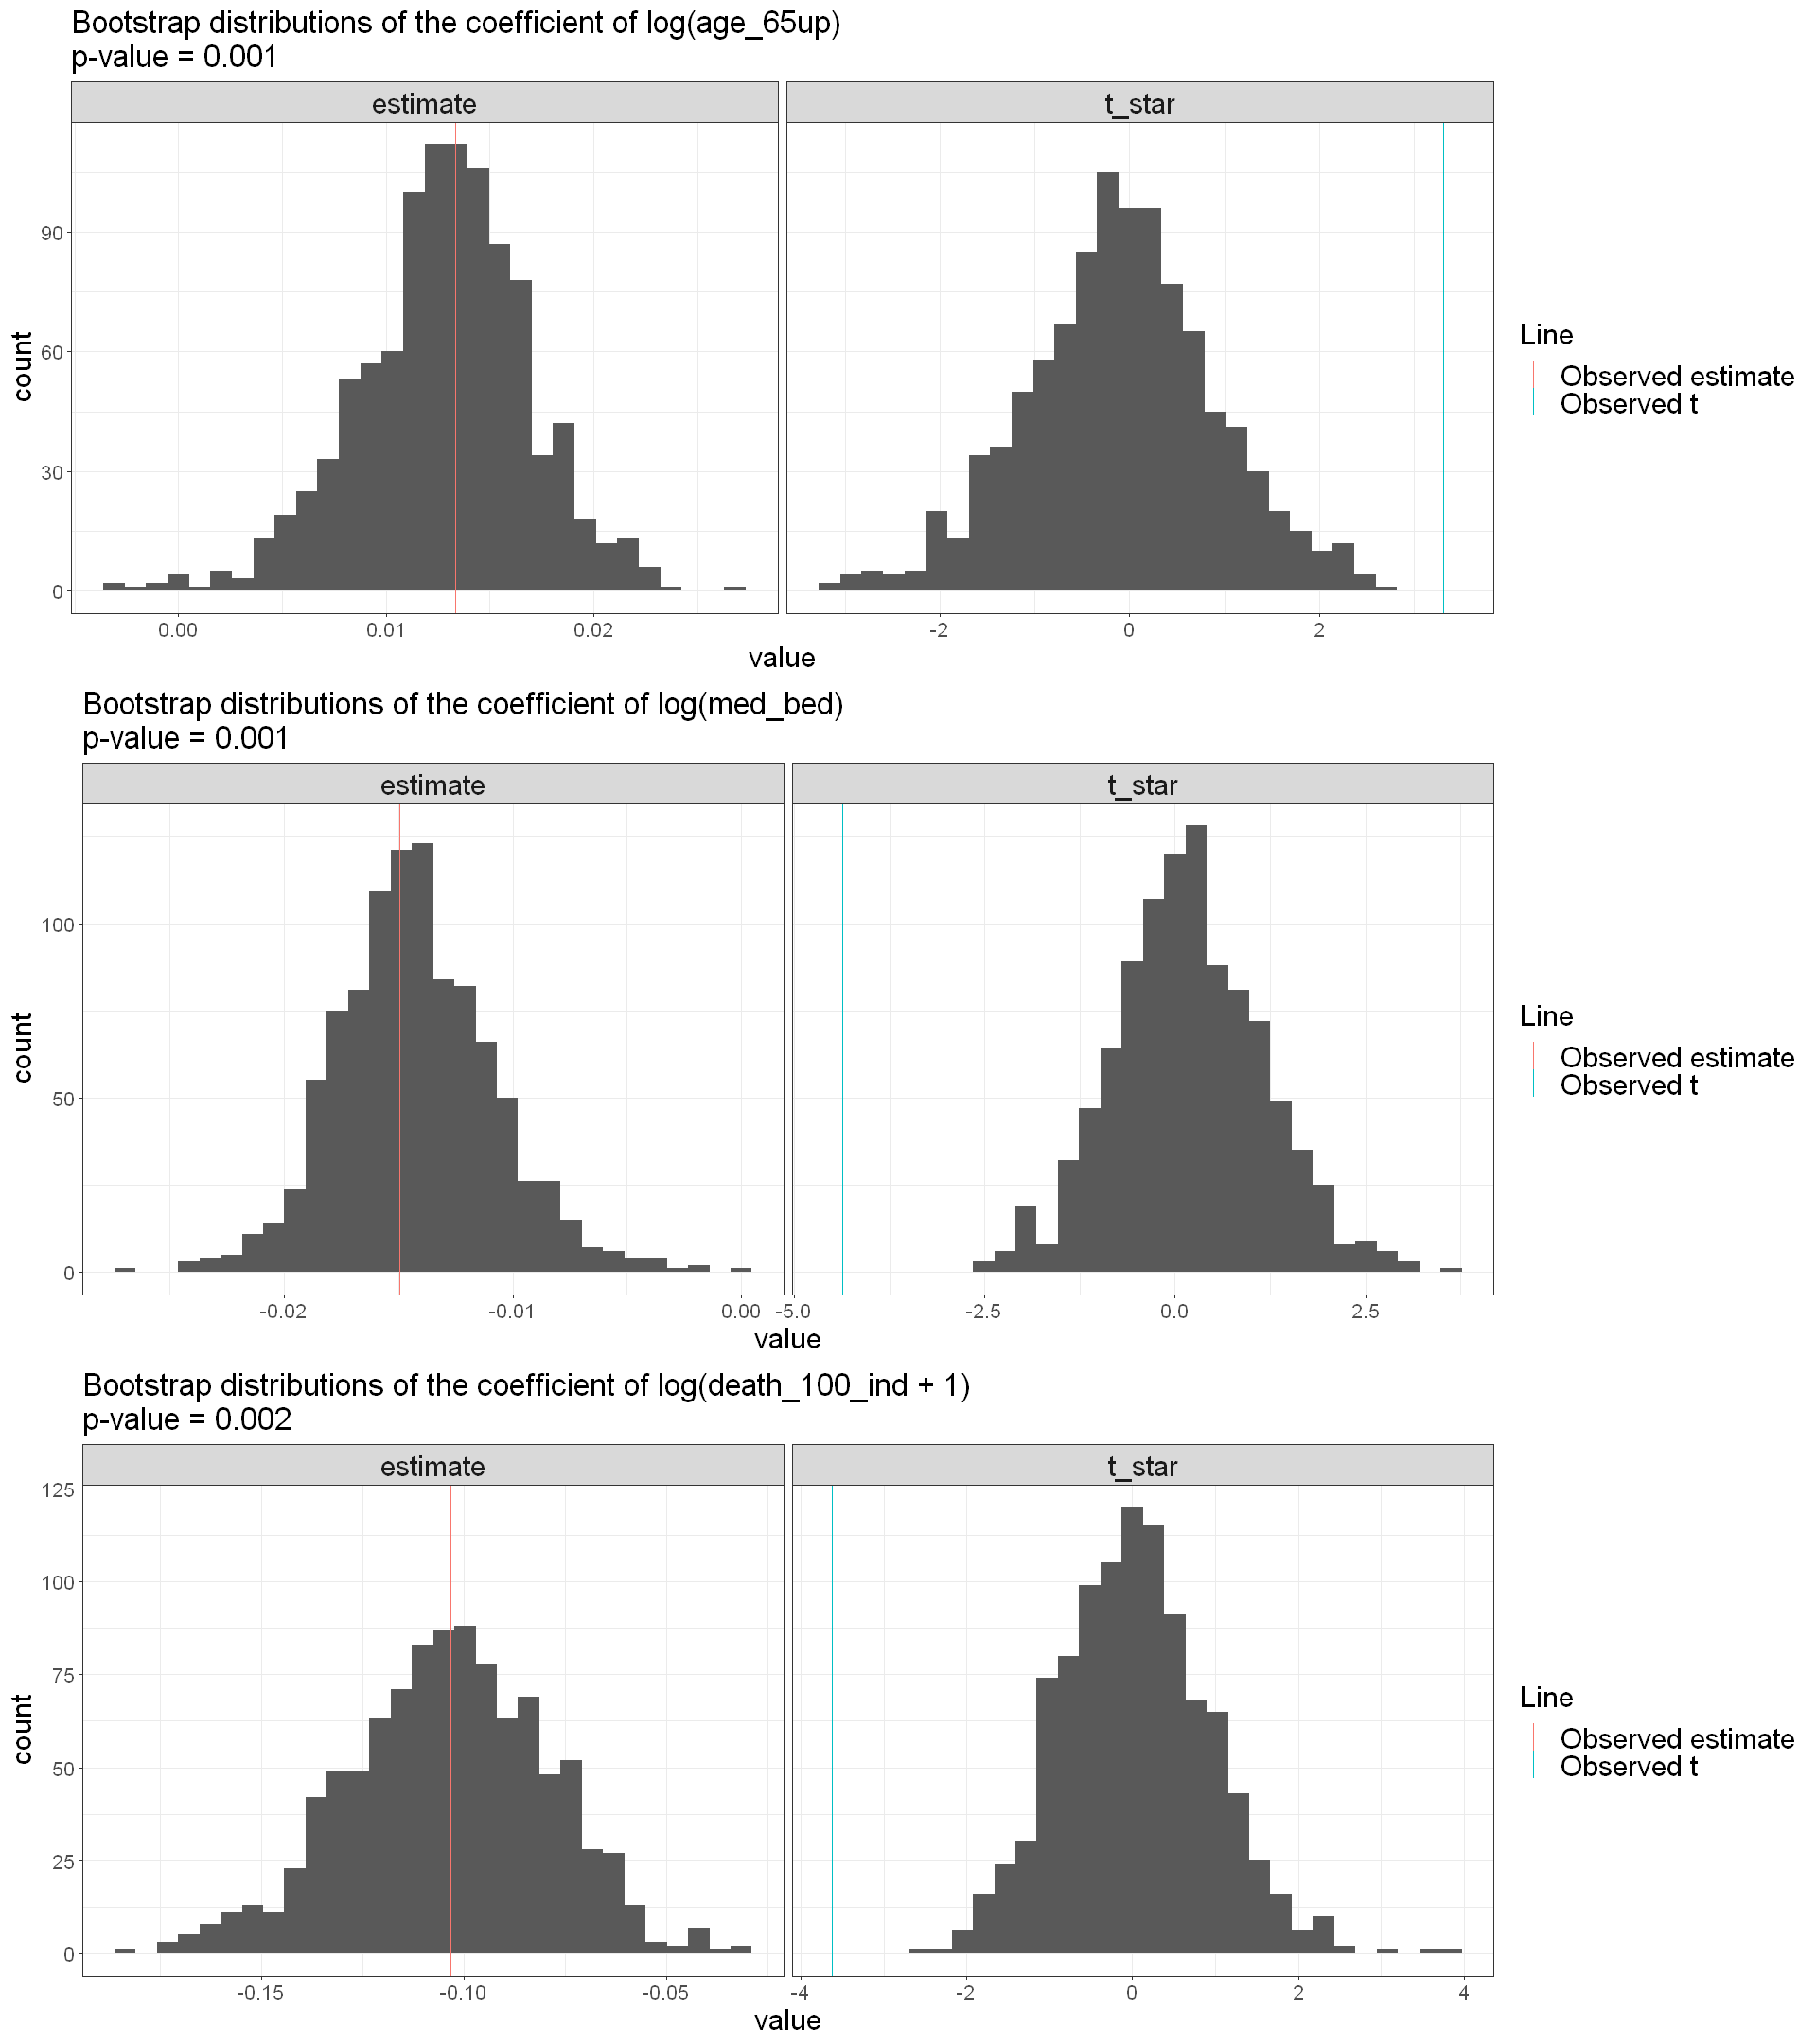

In [262]:
options(repr.plot.width = 16, repr.plot.height = 18)
plot_grid(age_65up_plot, med_bed_plot, death_100_ind_plot, nrow = 3)

Based on the bootstrapping results, the coefficients of `log(age_65up)`, `log(med_bed)`, `log(death_100_ind + 1)` are all significant (p-value < 0.05).

## 8. Summary and conclusions


In this analysis, I attempted to use a linear model to explain the relationship between the portion of the senior (`age_65up`%) in the population and the COVID-19 death rate. I tried several linear models and finally decided to train a generalized linear model with a Gamma-distribution dependent variable. My final model is:

$\frac{132\text{rate} + 2}{133}=0.103 + 0.0133log(\text{age_65up}) -0.0149log(\text{med_bed}) -0.103log(\text{death_100_ind} + 1)$, 

where the response (`rate`) follows a Gamma distribution.

I understand that this is a simplified model and I may not include all possible confounding variables in the model. And the "LINE" conditions for multiple linear models may not hold for this model. So I used bootstrapping for statistical inference. Given the bootstrapping results, the coefficient of `log(age_65up)` is significant (p-value < 0.05). I have the evidence to reject the null hypothesis and accept the alternative hypothesis. So the portion of the senior (age 65 and up) in the population (population aging) is associated with the COVID-19 death rate.
